<a href="https://colab.research.google.com/github/PaulToronto/DataCamp-Track---Machine-Learning-Scientist-in-Python/blob/main/4_1_Introduction_to_k_Means_Clustering_with_scikit_learn_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4.1 - Introduction to k-Means Clustering with scikit-learn in Python

https://www.datacamp.com/tutorial/k-means-clustering-python

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Data

In [2]:
data_base_url = 'https://drive.google.com/uc?id='

In [3]:
id = '14Ozc6mOxpSUBrSIDgJUHEpyjCJuvC-bH'
housing = pd.read_csv(data_base_url + id, usecols=['longitude',
                                                   'latitude',
                                                   'median_house_value'])
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   median_house_value  20640 non-null  float64
dtypes: float64(3)
memory usage: 483.9 KB


In [4]:
housing.head()

,longitude,latitude,median_house_value
0,-122.23,37.88,452600.0
1,-122.22,37.86,358500.0
2,-122.24,37.85,352100.0
3,-122.25,37.85,341300.0
4,-122.25,37.85,342200.0


In [5]:
housing.isnull().sum(axis=0)

,0
longitude,0
latitude,0
median_house_value,0


## Introduction

- **k-means clustering** is a clustering algorithm that does a good job of grouping spherical data together into distinct groups.
- It is useful both as an analysis tool and as a feature-engineering step for improving supervised learning models

## Visualize the Data

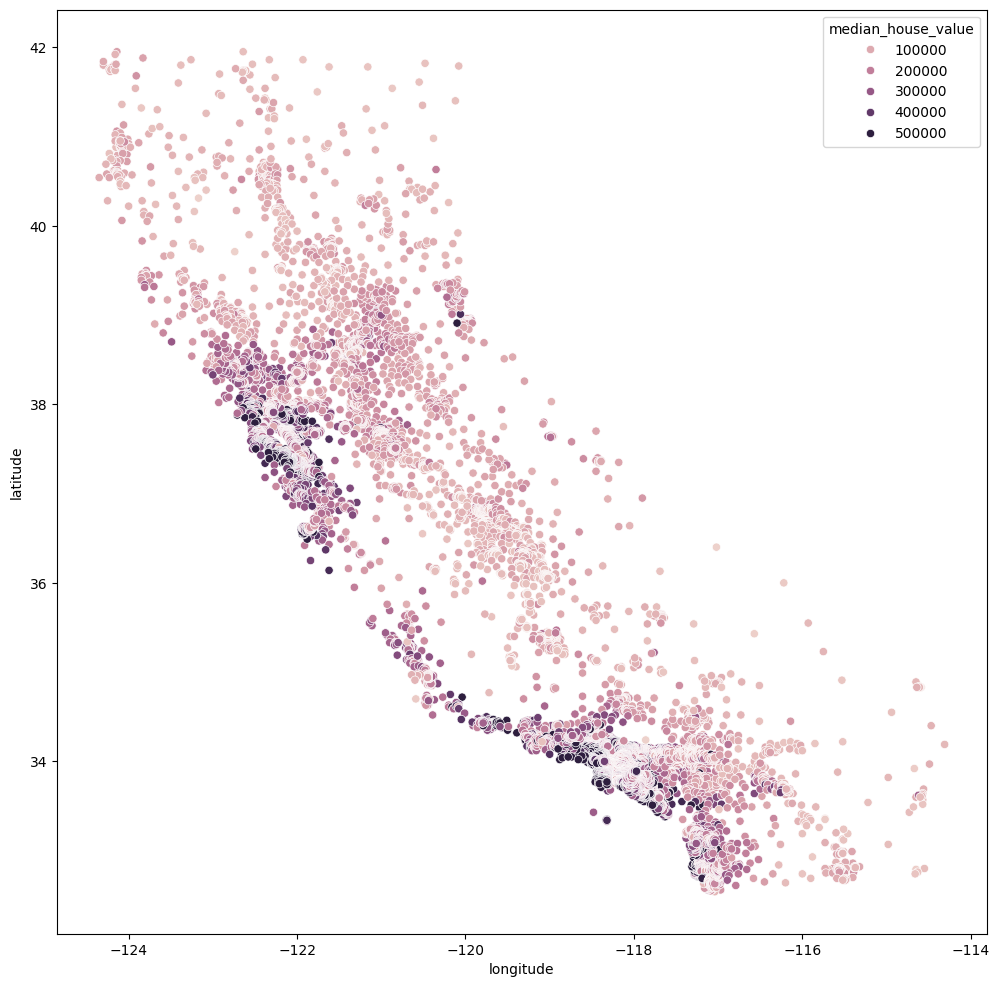

In [6]:
plt.figure(figsize=(12, 12))
sns.scatterplot(data=housing,
                x='longitude',
                y='latitude',
                hue='median_house_value');

## Split the Data

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    housing[['latitude', 'longitude']],
    housing['median_house_value'],
    test_size=0.33,
    random_state=0
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13828, 2), (6812, 2), (13828,), (6812,))

## Normalize the Data

- When working with distance_based algorithms, like k-Means Clustering, we must normalize the data
    - Otherwise, varaibles with different scaling will be weighted differently in the distance formula that is being optimized during training
- **IMPORTANT**:
    - **StandardScaler** is feature-wise (operates on columns), ensuring that each feature has similar scales.
	- **Normalizer** is sample-wise (operates on rows), ensuring that each sample has unit norm.
        - Same applies to `preprocessing.normlize` by default, but the axis can be changed

In [8]:
# this is a VERY questionable choice
#. I've included this here because that is what the tutorial instructs
X_train_norm = preprocessing.normalize(X_train) # axis=1 by default
X_test_norm = preprocessing.normalize(X_test)

In [9]:
for i, row in enumerate(X_train_norm):
    if i == 5: break
    print(np.sqrt(row[0]**2 + row[1]**2)) # l2 norm is the default

1.0
0.9999999999999999
1.0
1.0
1.0


In [10]:
scaler = preprocessing.StandardScaler()
X_train_standard = scaler.fit_transform(X_train)
X_test_standard = scaler.fit_transform(X_test)

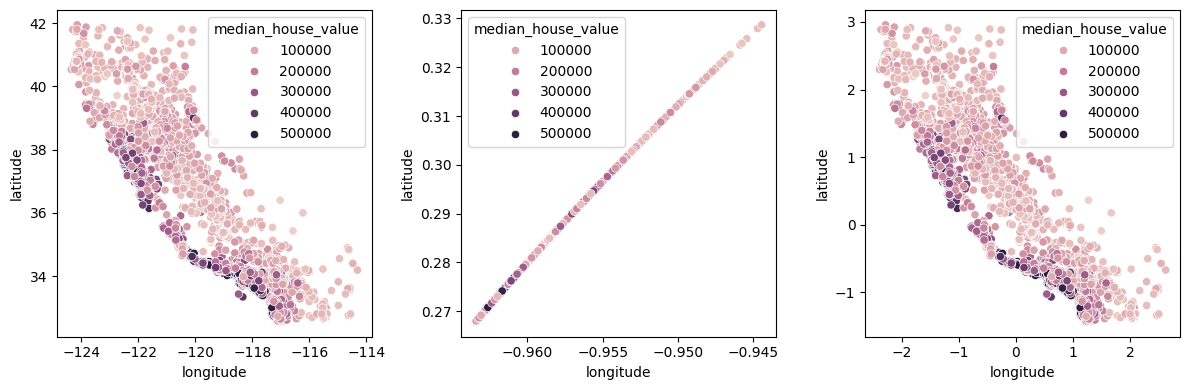

In [11]:
# note the scatterplots look different, that's because normalize is sample-wise
not_norm_df = pd.concat([X_train, y_train], axis=1)
norm_df = pd.concat([pd.DataFrame(X_train_norm, index=X_train.index),
                     pd.DataFrame(y_train, index=y_train.index)],
                    axis=1)
norm_df.columns = ['latitude', 'longitude', 'median_house_value']
standard_df = pd.concat([pd.DataFrame(X_train_standard, index=X_train.index),
                         pd.DataFrame(y_train, index=y_train.index)],
                        axis=1)
standard_df.columns = ['latitude', 'longitude', 'median_house_value']


fig, axes = plt.subplots(1, 3, figsize=(12, 4))

sns.scatterplot(data=not_norm_df, x='longitude', y='latitude',
                hue='median_house_value', ax=axes[0])
sns.scatterplot(data=norm_df, x='longitude', y='latitude',
                hue='median_house_value', ax=axes[1])
sns.scatterplot(data=standard_df, x='longitude', y='latitude',
                hue='median_house_value', ax=axes[2])

plt.tight_layout()
plt.show()

## Fit and Evaluate the Model

In [12]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans_norm = KMeans(n_clusters=3, random_state=0)
kmeans_standard = KMeans(n_clusters=3, random_state=0)

In [13]:
kmeans.fit(X_train)
kmeans_norm.fit(X_train_norm)
kmeans_standard.fit(X_train_standard)

KMeans(n_clusters=3, random_state=0)

In [14]:
kmeans.labels_

array([2, 0, 2, ..., 1, 2, 2], dtype=int32)

In [15]:
kmeans_norm.labels_

array([2, 2, 2, ..., 0, 2, 2], dtype=int32)

In [16]:
kmeans_standard.labels_

array([1, 0, 1, ..., 2, 1, 1], dtype=int32)

In [17]:
(kmeans.labels_ == kmeans_norm.labels_).sum() / len(X_train)

0.6887474689036737

In [18]:
(kmeans.labels_ == kmeans_standard.labels_).sum() / len(X_train)

0.08793751807925948

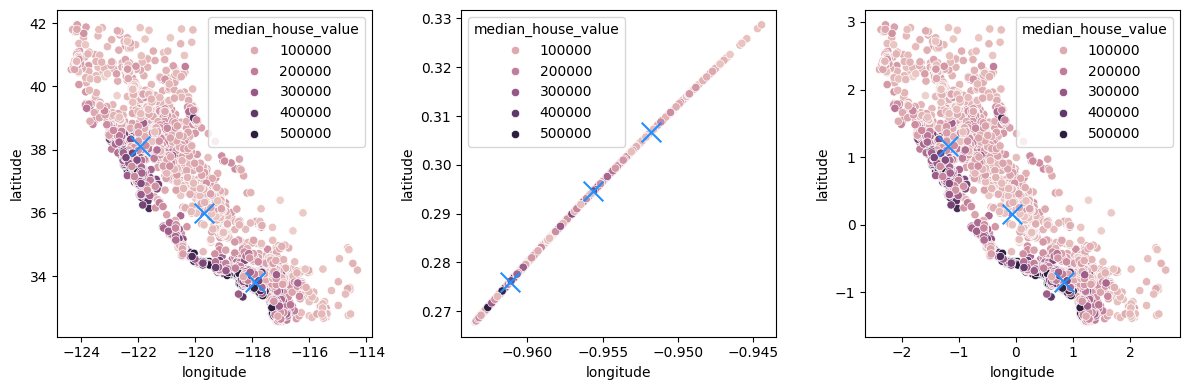

In [19]:
# note the scatterplots look different, that's because normalize is sample-wise
not_norm_df = pd.concat([X_train, y_train], axis=1)
norm_df = pd.concat([pd.DataFrame(X_train_norm, index=X_train.index),
                     pd.DataFrame(y_train, index=y_train.index)],
                    axis=1)
norm_df.columns = ['latitude', 'longitude', 'median_house_value']
standard_df = pd.concat([pd.DataFrame(X_train_standard, index=X_train.index),
                         pd.DataFrame(y_train, index=y_train.index)],
                        axis=1)
standard_df.columns = ['latitude', 'longitude', 'median_house_value']


fig, axes = plt.subplots(1, 3, figsize=(12, 4))

sns.scatterplot(data=not_norm_df, x='longitude', y='latitude',
                hue='median_house_value', ax=axes[0])
axes[0].scatter(kmeans.cluster_centers_[:, 1],
                kmeans.cluster_centers_[:, 0],
                color='dodgerblue', s=200, marker='x')
sns.scatterplot(data=norm_df, x='longitude', y='latitude',
                hue='median_house_value', ax=axes[1])
axes[1].scatter(kmeans_norm.cluster_centers_[:, 1],
                kmeans_norm.cluster_centers_[:, 0],
                color='dodgerblue', s=200, marker='x')
sns.scatterplot(data=standard_df, x='longitude', y='latitude',
                hue='median_house_value', ax=axes[2])
axes[2].scatter(kmeans_standard.cluster_centers_[:, 1],
                kmeans_standard.cluster_centers_[:, 0],
                color='dodgerblue', s=200, marker='x')

plt.tight_layout()
plt.show()

In [20]:
# mapping to make comparisons easier
mapping = np.array(['Middle', 'North', 'South'])
kmeans_labels = mapping[kmeans.labels_]
kmeans_norm_labels = mapping[kmeans_norm.labels_]

mapping = np.array(['Middle', 'South', 'North'])
kmeans_standard_labels = mapping[kmeans_standard.labels_]

In [21]:
kmeans_standard_centers = scaler.inverse_transform(kmeans_standard.cluster_centers_)

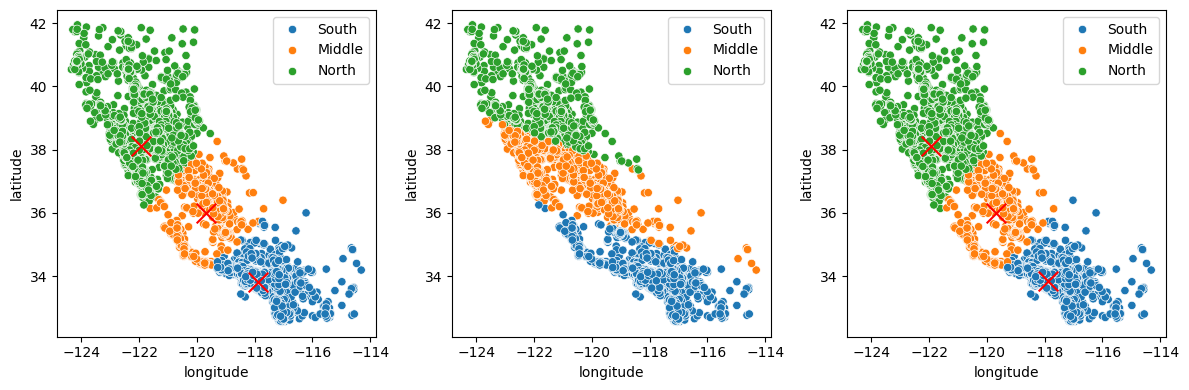

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

sns.scatterplot(data=X_train, x='longitude', y='latitude',
                hue=kmeans_labels, ax=axes[0])
axes[0].scatter(kmeans.cluster_centers_[:, 1],
                kmeans.cluster_centers_[:, 0],
                color='red', s=200, marker='x')
sns.scatterplot(data=X_train, x='longitude', y='latitude',
                hue=kmeans_norm_labels, ax=axes[1])
# no centroids for this one because preprocessing.normalize
#. can't be inverted. Neither can Normalizer
sns.scatterplot(data=X_train, x='longitude', y='latitude',
                hue=kmeans_standard_labels, ax=axes[2])
axes[2].scatter(kmeans_standard_centers[:, 1],
                kmeans_standard_centers[:, 0],
                color='red', s=200, marker='x')

plt.tight_layout()
plt.show()

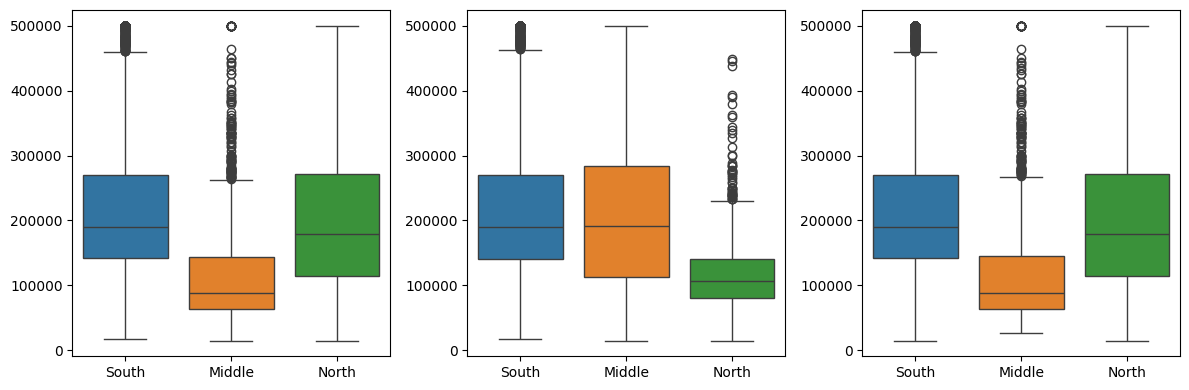

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

sns.boxplot(x=kmeans_labels, y=y_train.values, hue=kmeans_labels,  ax=axes[0])
sns.boxplot(x=kmeans_norm_labels, y=y_train.values, hue=kmeans_norm_labels, ax=axes[1])
sns.boxplot(x=kmeans_standard_labels, y=y_train.values, hue=kmeans_standard_labels, ax=axes[2])

plt.tight_layout()
plt.show()

## Silhouette Score vs. Inertia to Evaluate the Performance of the Clustering

- `silhouette_score`: ranges from -1 to 1
    - 1 for perfecxt clusters (compact and well separted)
    - 0 for overlapping clusters
    - Negataive: points are misclassified
- `.inertia_`
    - lower is better
    - sensitive to scale
    - use elbow method to find best `k`

In [24]:
(silhouette_score(X_train, kmeans.labels_, metric='euclidean'),
 silhouette_score(X_train, kmeans_labels, metric='euclidean'),
 kmeans.inertia_)

(0.6469493536474553, 0.6469493536474553, 12282.6784911664)

In [25]:
# If the sample-wise normalization artificially improves silhouette score by
#. changing distances between points, it doesn’t reflect meaningful clustering.
(silhouette_score(X_train_norm, kmeans_norm.labels_, metric='euclidean'),
 silhouette_score(X_train_norm, kmeans_norm_labels, metric='euclidean'),
 kmeans_norm.inertia_)

(0.7499371920703546, 0.7499371920703546, 0.164967339112174)

In [26]:
(silhouette_score(X_train_standard, kmeans_standard.labels_, metric='euclidean'),
 silhouette_score(X_train_standard, kmeans_standard_labels, metric='euclidean'),
 kmeans_standard.inertia_)

(0.6461348927082506, 0.6461348927082506, 2852.154451841965)

## The Elbow Method

See this notebook for more on that: https://colab.research.google.com/drive/1YYqFkjRv1AXbzFilp7zItHOw4-1otJnc#scrollTo=Wytu2XRamO9d